In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np

C:\Users\aenfi\Miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [106]:
#import os
#if not os.path.exists('fig'):
#    os.makedirs('fig')

In [107]:
# some of the handbook code raises (many) warnings
# fix w/ https://docs.python.org/2/library/warnings.html#temporarily-suppressing-warnings
import warnings

In [108]:
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

# Overview

This notebook covers all of the stuff in the ML chapter, up to and not including the in-depth coverage (for example, of specific ML algorithms). 

# Classification example figures

In [109]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

In [110]:
# create 50 'separable points'
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

In [111]:
# fit SVM classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

In [113]:
# predict the labels
y2 = clf.predict(X2)
y2

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1])

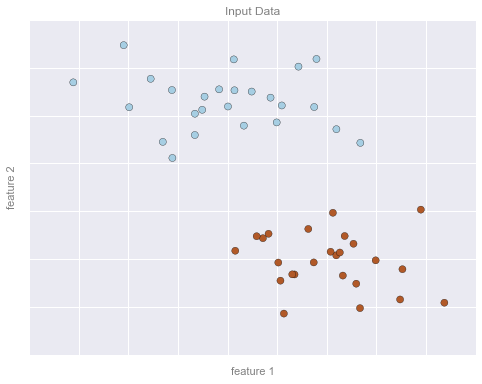

In [114]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')

In [115]:
# get contours describing the model
# this looks like the lines showing the support vectors
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)

In [116]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    Z = np.array([clf.decision_function(t)
                  for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

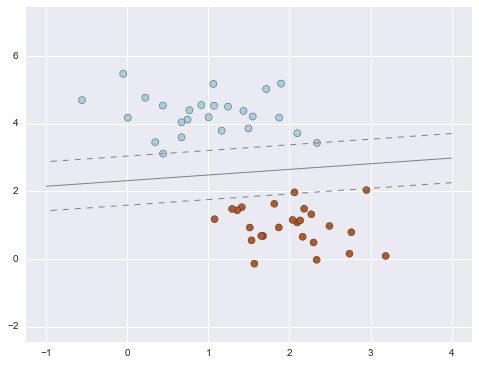

In [117]:
# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels=[-1.0, 0.0, 1.0],
                  linestyles=['dashed','solid','dashed'],
                  colors='gray', linewidths=1)
ax.scatter(X[:,0], X[:,1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

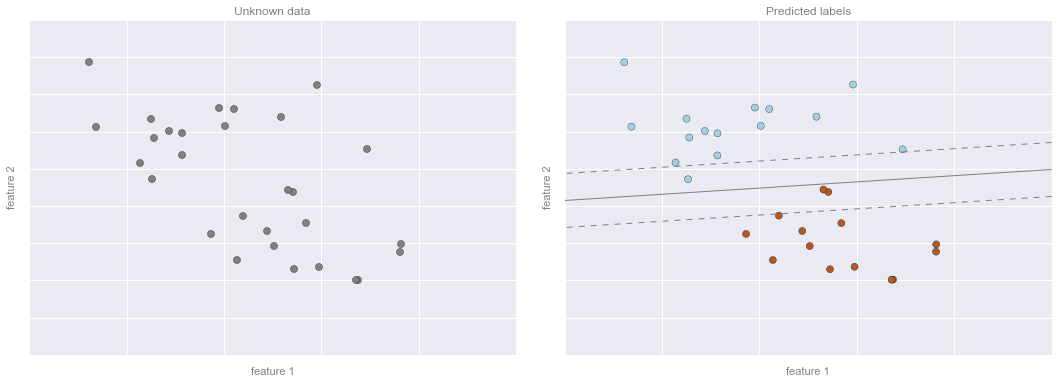

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:,0], X2[:,1], c='gray', **point_style)
ax[0].axis([-1,4,-2,7])

ax[1].scatter(X2[:,0], X2[:,1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1,4,-2,7])

format_plot(ax[0], 'Unknown data')
format_plot(ax[1], 'Predicted labels')

# Regression example figures

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
# create random data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200,2)
y = np.dot(X, [2, 1]) + 0.1 * rng.randn(X.shape[0])

In [121]:
# fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
# create new points to predict
X2 = rng.randn(100, 2)

# and predict the labels
y2 = model.predict(X2)

[-4, 4, -3, 3]

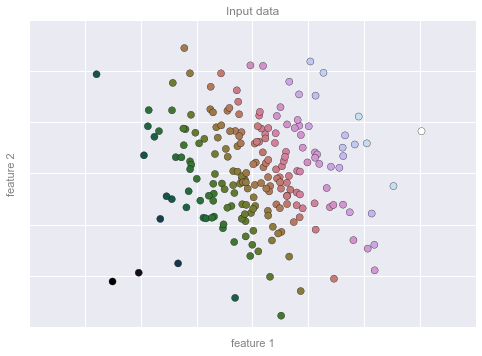

In [123]:
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cubehelix')

format_plot(ax, 'Input data')
ax.axis([-4, 4, -3, 3])

In [124]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [125]:
points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

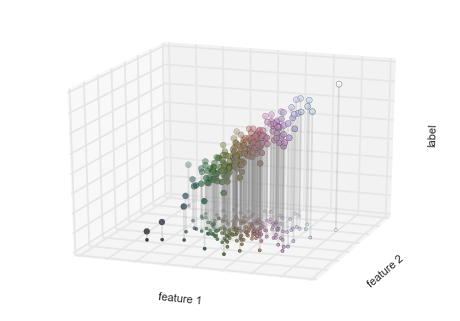

In [126]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, s=35, cmap='cubehelix')
ax.add_collection3d(Line3DCollection(segments, colors='gray', alpha=0.2))
ax.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10, cmap='cubehelix')

ax.patch.set_facecolor('white')
ax.view_init(elev=20, azim=-70)
ax.set_zlim3d(-8, 8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel='feature 1', ylabel='feature 2', zlabel='label')

# hide axis - author asks if there's a better way
ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)
for tick in ax.w_xaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_yaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_zaxis.get_ticklines():
    tick.set_visible(False)

[-4, 4, -3, 3]

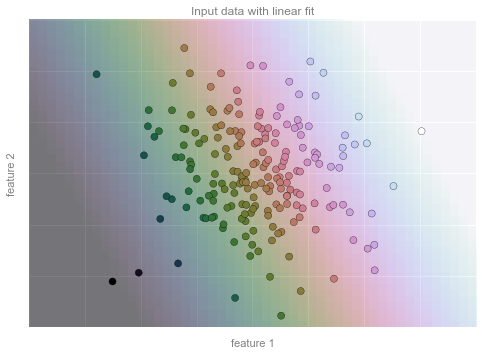

In [127]:
# plot data points
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cubehelix', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4, 4),
                     np.linspace(-3, 3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = model.predict(Xfit)
zz = yfit.reshape(xx.shape)
ax.pcolorfast([-4, 4], [-3, 3], zz, alpha=0.5, cmap='cubehelix',
              norm=pts.norm, zorder=1)

format_plot(ax, 'Input data with linear fit')
ax.axis([-4, 4, -3, 3])

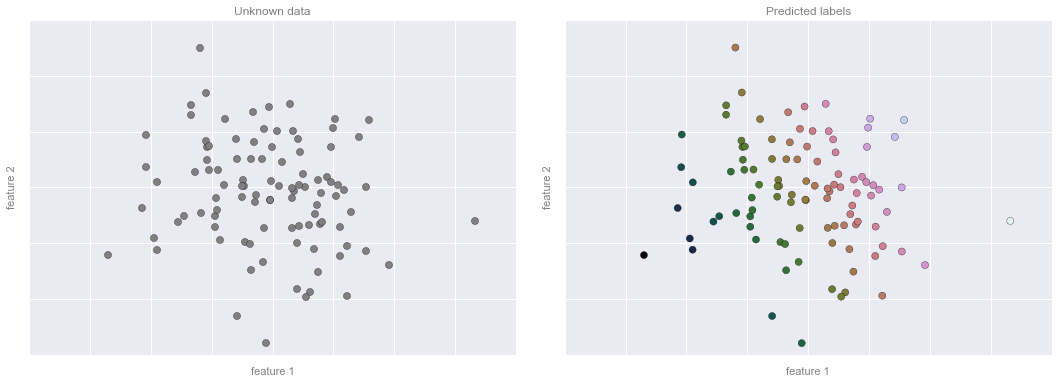

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', s=50)
ax[0].axis([-4, 4, -3, 3])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50,
              cmap='cubehelix', norm=pts.norm)
ax[1].axis([-4, 4, -3, 3])

format_plot(ax[0], 'Unknown data')
format_plot(ax[1], 'Predicted labels')

# Clustering example figures

In [129]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [130]:
# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# fit the model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

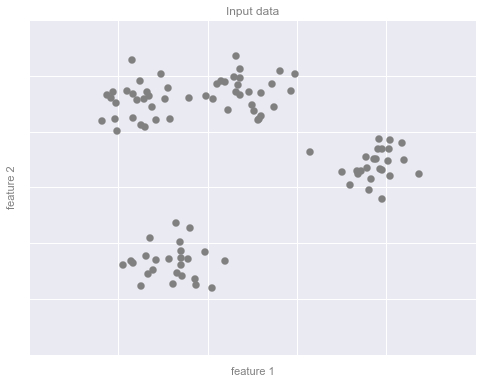

In [131]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

format_plot(ax, 'Input data')

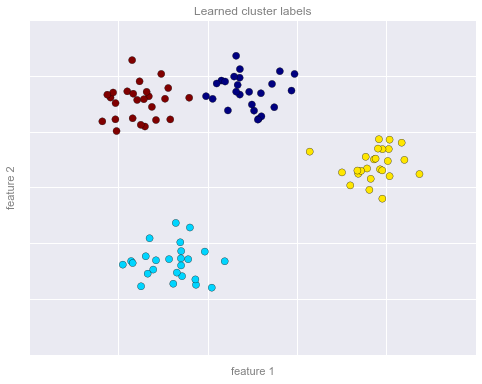

In [132]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='jet')

format_plot(ax, 'Learned cluster labels')

# Dimensionality reduction

In [133]:
from sklearn.datasets import make_swiss_roll

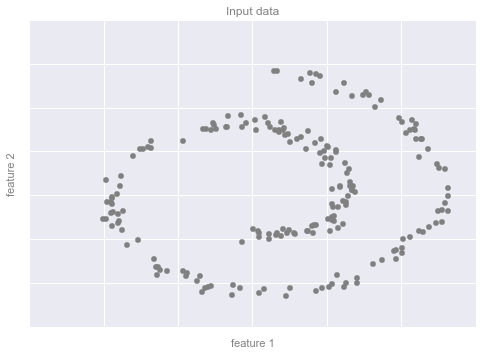

In [134]:
# make data
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]

# visualize data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='gray', s=30)

format_plot(ax, 'Input data')

In [135]:
from sklearn.manifold import Isomap

In [136]:
model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

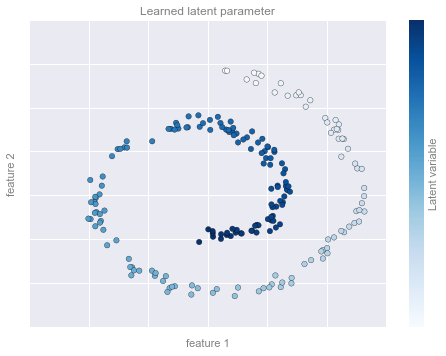

In [137]:
# visualize
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='Blues', s=30)
cb = fig.colorbar(pts, ax=ax)

format_plot(ax, 'Learned latent parameter')
cb.set_ticks([])
cb.set_label('Latent variable', color='gray')

# Introducing Scikit-Learn

In [138]:
import seaborn as sns; sns.set()

C:\Users\aenfi\Miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [139]:
iris = sns.load_dataset('iris')
iris[:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


C:\Users\aenfi\Miniconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


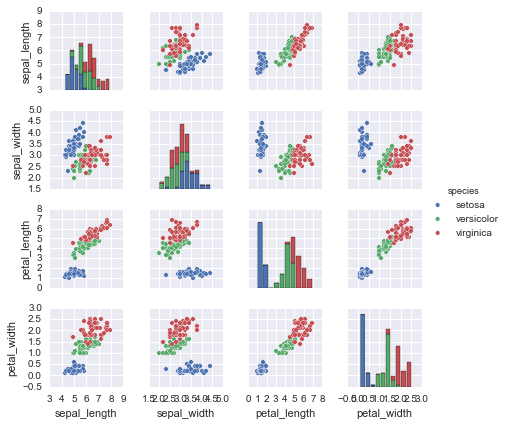

In [140]:
sns.pairplot(iris, hue='species', size=1.5)

In [141]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [142]:
y_iris = iris['species']
y_iris.shape

(150,)

## Simple linear regression

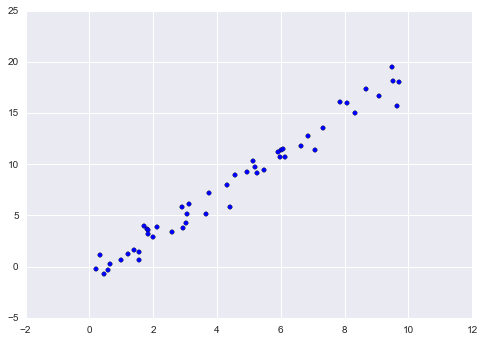

In [143]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [144]:
x

array([ 3.74540119,  9.50714306,  7.31993942,  5.98658484,  1.5601864 ,
        1.5599452 ,  0.58083612,  8.66176146,  6.01115012,  7.08072578,
        0.20584494,  9.69909852,  8.32442641,  2.12339111,  1.81824967,
        1.8340451 ,  3.04242243,  5.24756432,  4.31945019,  2.9122914 ,
        6.11852895,  1.39493861,  2.92144649,  3.66361843,  4.56069984,
        7.85175961,  1.99673782,  5.14234438,  5.92414569,  0.46450413,
        6.07544852,  1.70524124,  0.65051593,  9.48885537,  9.65632033,
        8.08397348,  3.04613769,  0.97672114,  6.84233027,  4.40152494,
        1.22038235,  4.9517691 ,  0.34388521,  9.09320402,  2.58779982,
        6.62522284,  3.11711076,  5.20068021,  5.46710279,  1.84854456])

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
# instantiate model w/ hyperparams, don't apply to data yet
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
# y is already in a 1D array w/ length n_samples so no need for processing
# x needs to be size [n_samples, n_features]
x.shape # it's not, yet

(50,)

In [148]:
X = x[:, np.newaxis]
X.shape # now it is

(50, 1)

In [149]:
x[:3]

array([ 3.74540119,  9.50714306,  7.31993942])

In [150]:
X[:3]

array([[ 3.74540119],
       [ 9.50714306],
       [ 7.31993942]])

In [151]:
# fit the model to the data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Note that fitting the model doesn't return anything - instead it modifies attributes that are part of the instantiated model instance. By convention, all of the attributes that are a result of learning/fitting havea  trailing underscore.

(Using the model for prediction, in comparison, appears to return the results.)

In [152]:
model.coef_  # slope

array([ 1.9776566])

In [153]:
model.intercept_  # y-intercept

-0.90331072553111635

Nicely put description of what the sklearn stuff does and doesn't, and comparison to statistical modeling:

"One question that frequently comes up regards the uncertainty in such internal model parameters. In general, scikit-learn does not provide tools to draw conclusions from internal model parameters themselves: this is much more a statistical modeling question than a machine learning question. Recall from Section X.X that we differentiated between statistical modeling, which generally asks what the models and their parameters mean, and machine learning, which generally asks what the models and their parameters predict. If you want to understand what the model parameters mean, machine learning is not really the appropriate set of tools: instead, I would recommend a Bayesian modeling approach to your problem (see Section X.X)."

In [154]:
# now predict using the model
xfit = np.linspace(-1, 11) # start, stop - defaults to 50 values
xfit.shape

(50,)

In [155]:
# need the same format as X: [n_samples, n_features]
Xfit = xfit[:, np.newaxis]
Xfit.shape

(50, 1)

In [156]:
# and then we can fit
yfit = model.predict(Xfit)
yfit.shape

(50,)

In [157]:
yfit[:3]

array([-2.88096733, -2.39664326, -1.9123192 ])

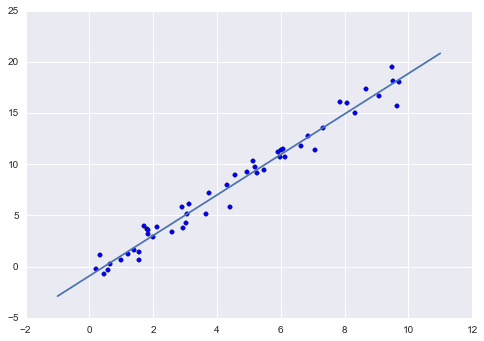

In [158]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

## Supervised learning example: iris classification

Start with Gaussian Naive Bayes because it's fast and simple (no hyperparameters). This gives you a baseline and you can try other more complicated learners to see if they're better.

In [159]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((112, 4), (38, 4), (112,), (38,))

In [160]:
# instantiate, train, and predict
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [161]:
# how well did it do?
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

## Unsupervised learning example: iris dimensionality

The iris data is four-dimensional. Can we reduce the dimensionality so we can visualize it more easily? Put differently, can we find a suitable lower-dimensional representation that retains the essential features of the data? If so, we can visualize using that lower dimensional representation - plotting 2D data is easier than 3D+.

We'll try PCA. It's linear, and we'll see if that works well.

Note that the pattern of four items - choose model, instantiate model, fit to data, and then use the model - is the same, even though we're doing unsupervised learning now. The differences are that we don't provide a set of y data in the fit method, and we use - for example - transform instead of predict in the last step.

In [162]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

C:\Users\aenfi\Miniconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


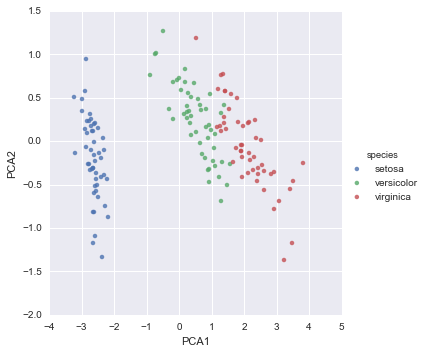

In [163]:
# plot - simple approach is to insert the results into the original dataframe
# and then plot those values
iris['PCA1'], iris['PCA2'] = X_2D.T
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', fit_reg=False)

This shows that - even though the PCA algorithm knew nothing about the actual labels - it was able to separate the species relatively well.

## Unsupervised learning: iris clustering

Gaussian Mixture Models (GMMs) attempt to model the data as a collection of 'Gaussian blobs'.

In [164]:
from sklearn.mixture import GMM
model = GMM(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris) # here we use predict to get the labels for the clusters

In [165]:
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [166]:
iris['cluster'] = y_gmm

C:\Users\aenfi\Miniconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


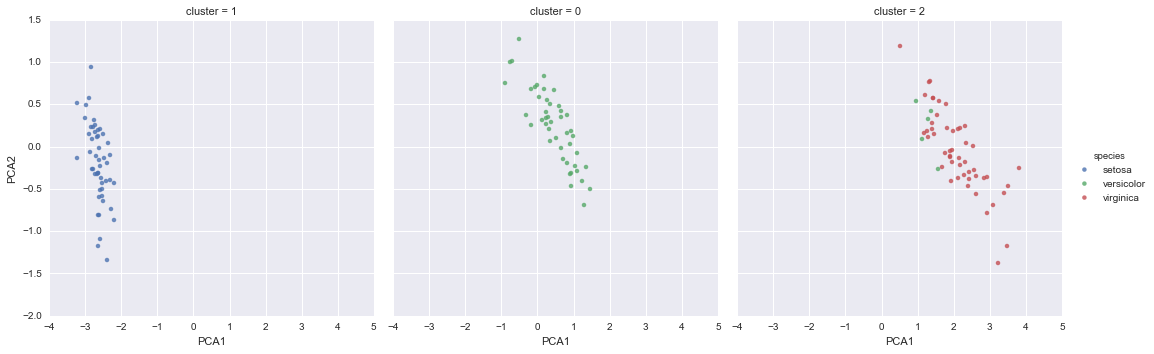

In [167]:
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

"By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly, while there remains a small amount of mixing between versicolor and virginica. What this tells us is that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm! This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing."

Note that the plots above use the three actual names, but only after the fact, so we can visually see how well the clustering algorithm has distinguished between the different species. That is, the clustering algorithm is what has decided which points go into each of the three plots, and it's done this clustering without any knowledge of the actual species values. 

# Application: exploring hand-written digits

In [168]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

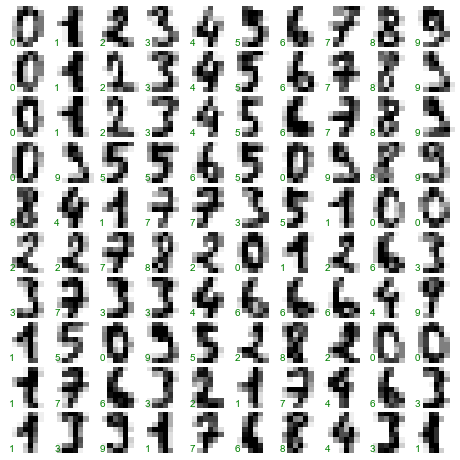

In [169]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
                         
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
                

The data attribute has one row per image, and for each image 64 locations that each represent one pixel.

In [170]:
X = digits.data
X.shape

(1797, 64)

In [171]:
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [172]:
y = digits.target
y.shape

(1797,)

In [173]:
y[0]

0

## Unsupervised learning: dimensionality reduction

We have 64 features, so conceptually a 64-dimensional parameter space. That's hard to visualize. So let's use Isomap - a 'manifold learning algorithm' to reduce the dimensionality to 2-D.

In [174]:
from sklearn.manifold import Isomap

In [175]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

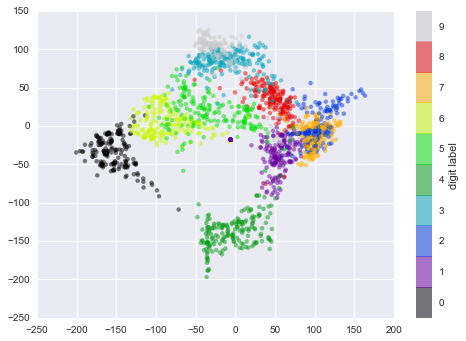

In [176]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('spectral',10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

The above shows how well (or not well) separated the different numbers are in the 2-D parameter space. For example, zeros (black) are pretty well separated from all other numbers. Some numbers - twos, sevens, ones, for example - overlap a lot. Per the textbook, a differentiation between target values like that shown above is 'fairly well-separated', which means that even a 'very straightforward supervised classifier' should perform well.

## Classifications on digits

In [177]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [178]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [179]:
accuracy_score(ytest, y_model)

0.83333333333333337

83% accuracy from a very simple model - good. 

But where do we fail?

In [180]:
from sklearn.metrics import confusion_matrix

In [181]:
mat = confusion_matrix(ytest, y_model)
mat

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]])

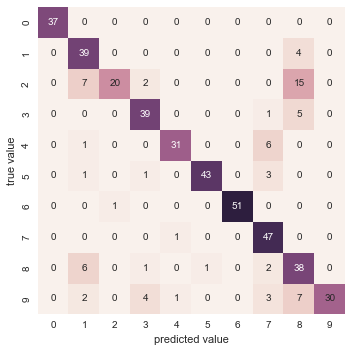

In [182]:
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

So, per the above, we mistakenly classify a lot of twos as eights and ones, for example.

Another way to look at what the model's doing is to show the images again, but with their predicted values.

In [183]:
Xtest.shape

(450, 64)

In [184]:
digits.images[1].shape

(8, 8)

In [185]:
Xtest[1].shape

(64,)

In [186]:
Xtest[1].reshape(8,8).shape

(8, 8)

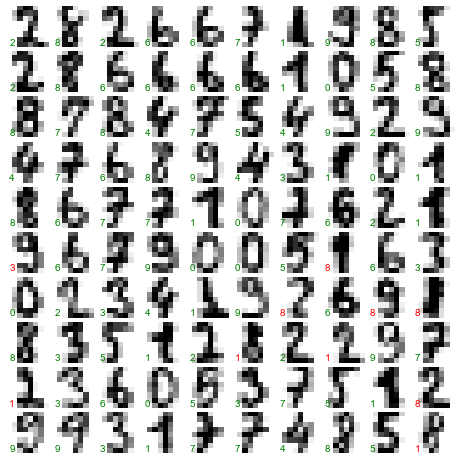

In [187]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8,8), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

The book draft is incorrect - it shows images from digits.images but the text and green/red comes from the training set. I fixed this above by replacing 'digits.images[i]' with 'Xtest[i].reshape(8,8)' (reshape is needed because Xtest is shape (64,) but imshow wants (and digits.images is) (8,8). 

# Hyperparameters and model validation

In [188]:
from sklearn.datasets import load_iris

In [189]:
iris = load_iris()
X = iris.data
y = iris.target

In [190]:
X[:3], y[:3]

(array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2]]), array([0, 0, 0]))

In [191]:
from sklearn.cross_validation import cross_val_score

In [192]:
cross_val_score(model, X, y, cv=5)

array([ 0.93333333,  0.96666667,  0.93333333,  0.93333333,  1.        ])

In [193]:
cross_val_score(model, X, y, cv=10)

array([ 0.93333333,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.93333333,  0.86666667,  1.        ,  1.        ,  1.        ])

Remember that leave one out is effectively cross-fold validation with a number of folds equal to the number of observations - i.e., we train the model n times, leaving out one of the observations each time.

In [194]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

Since we leave one out, we have only one observation, for each fit, with which to test that fit... so we can either have 100% accuracy - we predicted the correct value - or 0% accuracy - we predicted the incorrect value.

To estimate the performance overall, take the mean of all of the results.

In [195]:
scores.mean()

0.95333333333333337

You can do more w/ cross validation by looking at the sklearn.cross_validation submodule or the docs at http://scikit-learn.org/stable/modules/cross_validation.html.

## Selecting the best model

This section tries to help answer the question "if our estimator is underperforming, what should we do?" We could have one or more of the following answers:
- use a more complicated/more flexible model?
- use a less complicated/less flexible model?
- find more training observations?
- find additional features for the existing observations?

The answer relates to the bias-variance tradeoff. 

A less flexible model  - like, say, a linear regression line - can't vary too much, regardless of what the training data says - for example, it can only ever be a straight line. So, this less flexible model may underfit the data. Another way to say the same thing is to say that the less flexible model has low variance and, I think, in this case high bias, since it doesn't fit the data well.  

A more flexible model can overfit the data - it can react too much to the training data which of course includes signal AND noise. When it does this, the model is said to have high variance - it changes too much depending on the training data.

I think we want low variance and low bias. We can get this sometimes, depending on the characteristics of the data, but I don't think we can get it always. One example where we can see it is with underlying data that is tightly linear and a model that expects linear data (like linear regression).

This then leads to the idea of validation curves, which plot the model's score/accuracy - both the training score and the validation score - against the model's complexity, and typically have hte following properties:
- Training score is higher than the validation score everywhere, because the model will fit data it's seen better than data it hasn't.
- Models with low complexity (i.e., with high bias) will underfit the training data. These also underfit/don't predict well on the validation/unseen data.
- Models with very high complexity (high variance) will overfit/predict very well the training data, but predict validation/unseen data very poorly.
- Somewhere between the two extremes outlined in the previous bullets the validation curve - the score against validation/unseen data - will have a maximum. This intermediate level of complexity is a good tradeoff between bias and variance. 

You can get models that are at different points on the complexity scale by changing the type of model and by changing parameters of the model (for types of models with tunable parameters).

## Validation curves

Let's experiment with validation curves using polynomial regression, which has a tunable parameter that is the degree of the polynomial. For example, standard linear regression is the same as polynomial regression with parameter 1, parameter/degree 2 also allows a squared term, etc.

In [196]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [197]:
# the book describes this as combining linear regression with a 
# polynomial preprocessor, using a pipeline - not sure what this actually 
# means/is doing
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [198]:
# create some data to which we'll fit the model
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [199]:
X, y = make_data(100)

In [200]:
list(zip(X[:10], y[:10]))

[(array([ 0.17390735]), 6.6647654425881271),
 (array([ 0.51886738]), 6.3619436930554514),
 (array([  1.30815988e-08]), -0.30620270446865794),
 (array([ 0.09140498]), 5.6034503035618215),
 (array([ 0.02153729]), 2.0021674239663638),
 (array([ 0.00852642]), 1.547664700583669),
 (array([ 0.03469287]), 2.3533736955440485),
 (array([ 0.11941222]), 5.2416105562500777),
 (array([ 0.15742443]), 6.3019261782005938),
 (array([ 0.29032347]), 7.8480740322860836)]

In [201]:
X_test = np.linspace(-0.1, 1.1, 500)
X_test.shape

(500,)

In [202]:
X_test = X_test[:, None]
X_test.shape

(500, 1)

In [203]:
X_test[:3]

array([[-0.1       ],
       [-0.09759519],
       [-0.09519038]])

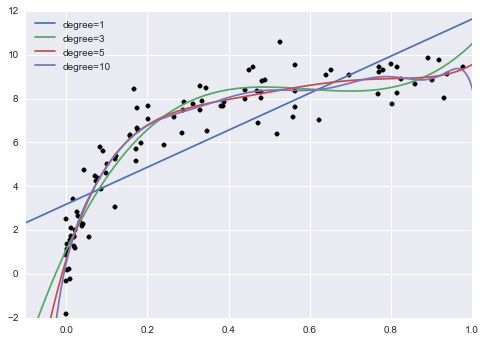

In [205]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5, 10]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

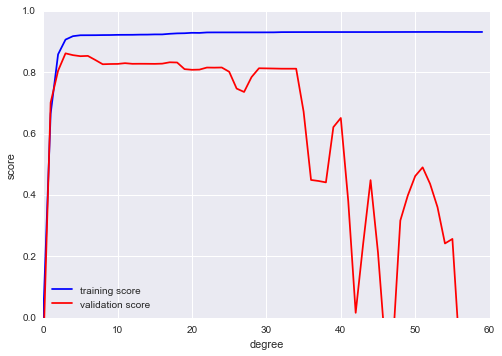

In [211]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 60)
# validation_curve needs a model, data, a parameter name (over which to 
# range, I think), and a range, and it computes the training and 
# validation scores for each value of the parameter
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', 
                                          degree, cv=7)
plt.plot(degree, np.median(train_score, 1), 
         color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), 
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

(-0.20000000000000001, 1.2000000000000002, -4.0, 12.0)

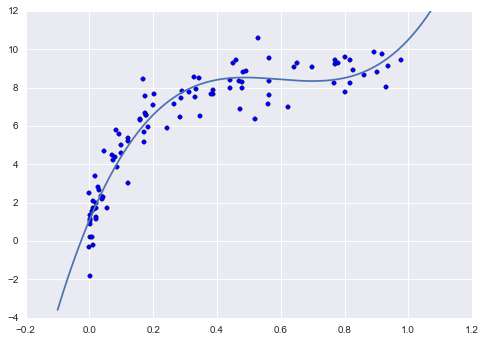

In [212]:
# degree looks good
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

## Learning curves

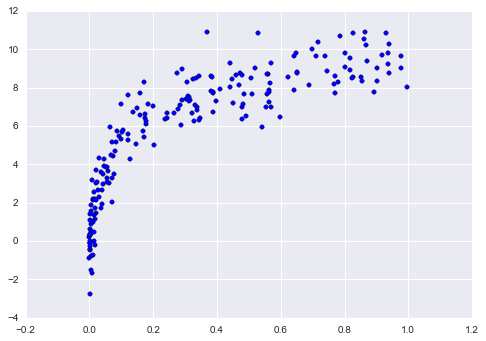

In [214]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

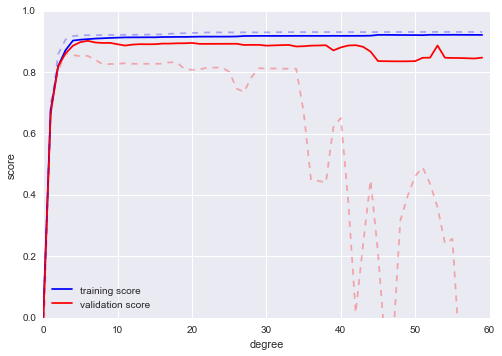

In [215]:
# compare validation curves for the previous and smaller dataset w/ this
# the validation curves for this larger dataset
degree = np.arange(0, 60)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree',
                                            degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), 
         color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), 
         color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), 
         color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), 
         color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

This is not a learning curve - it's a validation curve showing a comparison between two different data set sizes.

The larger dataset looks fine with a more complex model. This shows that validation curves have two important inputs: a) model complexity (as shown above), and b) the number of training data points. 

A plot of the training/validation score with respect to the size of the training set is called a 'learning curve'. We can generate this by using successively larger subsets of the actual data.

Learning curves have these characteristics:
- A model of a given complexity will overfit a small dataset: the training score will be relatively high and the validation score will be relatively low. This model has high variance.
- A model of a given complexity will underfit a large dataset: the training score decreases, the validation score increases.
- Because the model won't give a higher score (except by chance) to a validation set than to a training set, the two curves should get closer to each other (as the size of the dataset increases) and won't ever cross.

Importantly, the validation and training scores converge to a particular score as the size of the data gets large - this means that, once you've converged adding more points doesn't improve the score. (The only way then, to increase model performance, is to use another - often more complex - model).

In [216]:
from sklearn.learning_curve import learning_curve

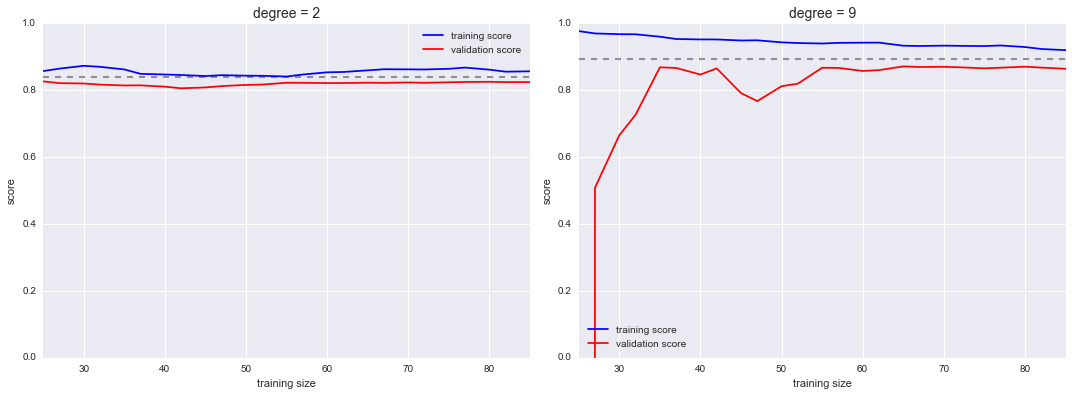

In [217]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y,
                                         cv=7,
                                         train_sizes=np.linspace(0.3,1,25))
    ax[i].plot(N, np.mean(train_lc, 1), 
               color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1),
               color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]),
                 N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

From the book: 

This is a valuable diagnostic, because it gives us a visual depiction of how our model responds to increasing training data. In particular, when your learning curve has already converged – when the training and validation curves are already close to each other – adding more training data will not significantly improve the fit! This situation is seen in the left panel, with the learning curve for the degree-2 model.

The only way to increase the converged score is to use a different (usually more complicated) model. We see this in the right panel: by moving to a much more complicated model, we increase the score of convergence (indicated by the dashed line), but at the expense of higher model variance (indicated by the difference between the training and validation scores). If we were to add even more data points, the learning curve for the more complicated model would eventually converge. 

Plotting a learning curve for your particular choice of model & dataset can help you to make this type of decision about how to move forward in improving your analysis. 

## Validation in practice: grid search

The plots above are simple: the model we're experimenting with has only a single hyperparameter. Typically models have more than one parameter and so the validation and learning curves are no longer lines - instead, they're multi-dimensional surfaces. In these cases folks typically may find the particular set of parameters that maximizes the validation score.

Scikit-learn provides a grid search module to do exactly this, in an automated fashion. An example follows.

In [218]:
from sklearn.grid_search import GridSearchCV

In [219]:
# 1. set up grid estimator
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [220]:
# 2. fit the model at each grid point, keeping track of scores
grid.fit(X, y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False], 'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [221]:
# look at the best parameters
grid.best_params_

{'linearregression__fit_intercept': True,
 'linearregression__normalize': False,
 'polynomialfeatures__degree': 5}

(-0.20000000000000001, 1.2000000000000002, -4.0, 12.0)

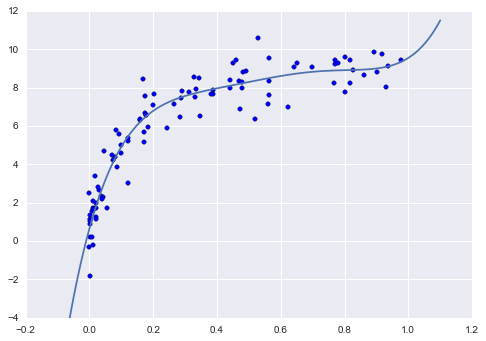

In [222]:
# or, use the best model and the fit to our data
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True)
plt.axis(lim)

Per the book, the grid search module provides a lot of additional functionality, including the ability to specify a custom scoring function, to parallelize the computations, to do randomized searches, and more.